In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

In [5]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [6]:
X.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [8]:
data_corr = X[['age', 'fnlwgt', 'education-num', 'capital-gain', 'hours-per-week']]

data_corr.corr()

,age,fnlwgt,education-num,capital-gain,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,0.082157
hours-per-week,0.071558,-0.013519,0.143689,0.082157,1.000000


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [23]:
X, y = make_classification(n_samples = 100_000,
                           n_features = 2,
                           n_informative = 2,
                           n_classes = 2,
                           n_clusters_per_class=1,
                           n_redundant = 0,
                           weights = [0.995,  0.005])


In [24]:
X

array([[ 0.33784345, -0.77539985],
       [-2.73236604, -2.95098348],
       [-1.19811684, -0.6919388 ],
       ...,
       [-1.04882513, -1.60330527],
       [-0.59804896, -1.8002088 ],
       [ 0.08404255,  0.06264086]])

In [34]:
np.unique(y)

array([0, 1])

In [25]:
df = pd.DataFrame({"feature1": X[:, 0],
                   'feature2': X[:, 1],
                   'targets': y})

df.head()

,feature1,feature2,targets
0,0.337843,-0.775400,0
1,-2.732366,-2.950983,0
2,-1.198117,-0.691939,0
3,-1.490088,-0.368585,0
4,-2.767023,-1.834292,0


In [36]:
df['targets'].value_counts(normalize  =True)

targets
0    0.99025
1    0.00975
Name: proportion, dtype: float64

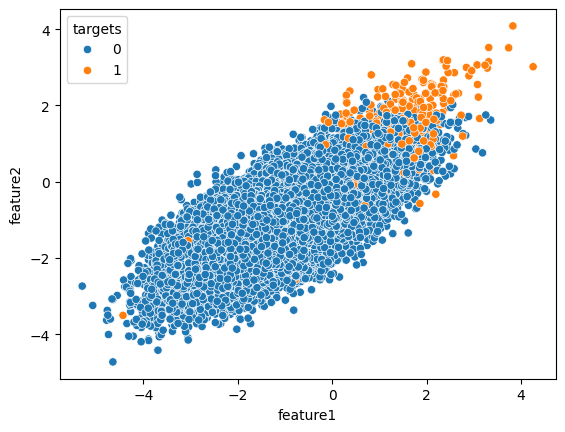

In [26]:
sns.scatterplot(data=df,x='feature1', y= 'feature2', hue = 'targets')
plt.show()

In [27]:
smote = SMOTE()

X_over, y_over = smote.fit_resample(X, y)

In [28]:
df_over = pd.DataFrame({"feature1": X_over[:, 0],
                   'feature2': X_over[:, 1],
                   'targets': y_over})
df_over.head()

,feature1,feature2,targets
0,0.337843,-0.775400,0
1,-2.732366,-2.950983,0
2,-1.198117,-0.691939,0
3,-1.490088,-0.368585,0
4,-2.767023,-1.834292,0


In [29]:
df.shape, df_over.shape

((100000, 3), (198050, 3))

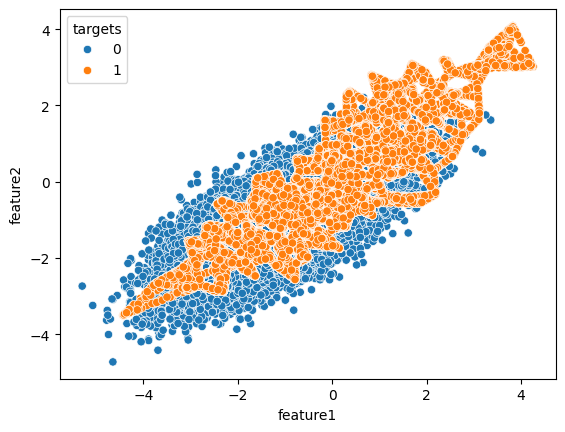

In [30]:
sns.scatterplot(data = df_over, x = 'feature1', y = 'feature2', hue = 'targets')
plt.show()